In [106]:
#importing the libraries
import math
#creating a class for the counting bloom filters
class CountingBloomFilters:
    """
    This class is used to create a counting bloom filter data structure
    The class has the following methods:
    1- __init__ : This method is used to initialize the class
    2- hash_cbf : This method is used to create the hash functions
    3- insert : This method is used to insert elements into the data structure
    4- delete : This method is used to delete elements from the data structure
    5- search : This method is used to search for an element in the data structure
    """
    
    def __init__(self, num_item, fpr):
        """
        This method is used to initialize the class and
        assignes the optimal values for the attributes based on the inputs

        Parameters:
        1- num_item : The expected size of the input (c), int
        2- fpr : The desired false positive probability (p), float

        The CBF has the following attributes:
        num_item : The expected size of the input (c), int
        fpr : The desired false positive probability (p), float
        memory_size : The optimal size of the array (m), int
        array : The array that will hold the elements, list
        num_hashfn : The optimal number of hashing functions (k), int
        """
        self.num_item = num_item
        self.fpr = fpr
        
        #getting the optimal memory_size (m) based on the fpr and the number of items
        self.memory_size = -1*round ((self.num_item * math.log (self.fpr)) / (math.log (2))**2)
        self.array = [0] * self.memory_size 
        #create the array with the optimal size with 0s to be used as counters
        
        #getting the optimal number of hashing functions
        #(k) based on the fpr and the number of items
        self.num_hashfn = round ((self.memory_size / self.num_item ) * math.log (2))
        
        #check if the number of hashing functions is more than 5
        #or less than 1, in order to set the limit
        if (self.num_hashfn < 1):
            self.num_hashfn = 1
        elif (self.num_hashfn > 5):
            self.num_hashfn = 5
    

    def hash_cbf(self, element):
        """
        This method is used to get hash values for the element

        Parameters:
        element : The element that will be hashed, int

        Returns:
        keys : The list of keys for the element, list
        """
        keys = [] #Create an empty list to hold the keys
        #Find the hash values for the element
        hashed_value1 = (hash (element) * 31 + 7) % self.memory_size
        hashed_value2 = (hash (element) * 11 + 5) % self.memory_size
        hashed_value3 = (hash (element) * 19 + 11) % self.memory_size
        hashed_value4 = (hash (element) * 29 + 7) % self.memory_size
        hashed_value5 = (hash (element) * 17 + 3) % self.memory_size
    
        #Convert the hash to integer and add it to the list
        keys.append(int (hashed_value1)) 
        keys.append(int (hashed_value2))
        keys.append(int (hashed_value3))
        keys.append(int (hashed_value4))
        keys.append(int (hashed_value5))
        return keys
    

    def insert(self, element):
        """
        This method is used to insert elements into the data structure

        Parameters:
        element : The element that will be inserted, int

        Returns:
        None
        """
        key=0 #define the key variable
        keys = self.hash_cbf (element) #get the keys for the element
        
        for index in range (self.num_hashfn): #for every key in the list up to the limit
            key = int (keys [index] % self.memory_size) #get the key moduls from the list size
            #in the array of cbf at the key index, increase the counter value by one
            self.array [key] += 1
            

    def delete(self, element):
        """
        This method is used to delete elements from the data structure

        Parameters:
        element : The element that will be deleted, int

        Returns:
        None
        """
        key = 0 #define the key variable
        keys = self.hash_cbf(element) #get the keys for the element
        
        if (self.search(element)):#Check if the element exists in the data structure
            for index in range(self.num_hashfn):#for every key in the list up to the limit
                key = int(keys[index] % self.memory_size)#get the key moduls from the list size
                #in the array of cbf at the key index, decrease the counter value by one
                self.array[key] = self.array[key] - 1 
                
        else: #If the element doesn't exist
            print("Element is not in the CBF!") #Error message

    def search(self, element):
        """
        This method is used to search for an element in the data structure
        
        Parameters:
        element : The element that will be searched for, int

        Returns:
        exists : The result of the search, bool
        """
        key = 0 #define the key variable
        exists = True #define the exists variable
        keys = self.hash_cbf (element) #get the keys for the element
        
        for index in range (self.num_hashfn): #for every key in the list up to the limit
            key = int (keys [index] % self.memory_size) #get the key moduls from the list size
            
            if self.array[key] == 0: #If the counter value is 0 
                exists = False #The element doesn't exist
                
        return exists

In [108]:
#testing the hash functions
#if two elements are equal they should have the same hash values
assert((hash ("1") * 31 + 7)% 101) == ((hash (str(1)) * 31 + 7)% 101)
assert((hash (45) * 11 + 5)% 101) == ((hash (int("45")) *  11 + 5)% 101)
assert((hash (266) * 19 + 11)% 101) == ((hash (int(266)) * 19 + 11)% 101)
assert((hash (266) * 29 + 7)% 101) == ((hash (float(266)) * 29 + 7)% 101)
assert((hash (2.5) * 17 + 3)% 101) == ((hash (5/2) *  17 + 3)% 101)

#testing the cbf by reating bloom filters of strigns
#and checking if the elements are in the bloom filter or not
cbf = CountingBloomFilters(10, 0.01)

#inserting 10 elements
for i in range(10):
    cbf.insert(str(i))

#checking if the elements are in the bloom filter
for i in range(10):
    assert(cbf.search(str(i)) == True)

#checking if the elements are not in the bloom filter
for i in range(11, 15):
    assert(cbf.search(str(i)) == False)
#assert(cbf.search(str(16)) == False) gives True due to #False positive


#testing the delete function

#deleting an element that is in the bloom filter
cbf.delete(str(0))
#checking if the element is in the bloom filter
assert(cbf.search(str(0)) == False)


In [24]:
url_version_1 = 'https://bit.ly/39MurYb' # URL for the first version of the text file
url_version_2 = 'https://bit.ly/3we1QCp' # URL for the second version of the text file
url_version_3 = 'https://bit.ly/3vUecRn' # URL for the third version of the text file
from requests import get # import the get function from the requests library
def get_txt_into_list_of_words(url):
    '''
    a function that takes a URL of the text as input
    and cleans the text data
    
    Input
    ----------
    url : string
    The URL for the txt file.
    Returns
    -------
    data_just_words_lower_case: list
    List of "cleaned-up" words sorted by the order they appear in the original file.
    '''
    bad_chars = [';', ',', '.', '?', '!', '_', '[', ']', '(', ')', '*'] # list of characters to remove
    data = get(url).text # get the text from the URL
    data = ''.join(c for c in data if c not in bad_chars) # remove the bad characters defined above
    data_without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in data) # replace newlines with spaces
    data_just_words = [word for word in data_without_newlines.split(" ") if word != ""] # split the text into words
    data_just_words_lower_case = [word.lower() for word in data_just_words] # convert all words to lower case
    return data_just_words_lower_case # return the list of words
version_1 = get_txt_into_list_of_words(url_version_1)
version_2 = get_txt_into_list_of_words(url_version_2)
version_3 = get_txt_into_list_of_words(url_version_3)

In [193]:
#get the phrases of the documents
def get_phrases(list_of_words): #defined as every 3 words
    """
    This function takes a list of words as input and returns a list of phrases.
    Each phrase is a string of 3 words separated by a space.
    Input
    ----------
    list_of_words : list
    A list of words.
    Returns
    -------
    phrases : list
    A list of phrases.
    """
    phrases = [] #define the phrases list
    for i in range(len(list_of_words)-2): #loop through the list of words up to the last 3 words
        phrases.append(list_of_words[i] + " " + list_of_words[i+1] + " " + list_of_words[i+2]) #append the phrase to the list
    return phrases

phrases_version_1 = get_phrases(version_1)
phrases_version_2 = get_phrases(version_2)
phrases_version_3 = get_phrases(version_3)

#create a counting bloom filter from the phrases of each document
def create_cbf(list_of_phrases, fprate=0.01):
    """
    This function takes a list of phrases as input and returns a counting bloom filter.
    Input
    ----------
    list_of_phrases : list
    A list of phrases.
    Returns
    -------
    cbf : CountingBloomFilters
    A counting bloom filter.
    """
    cbf = CountingBloomFilters(len(list_of_phrases), fprate)
    for phrase in list_of_phrases:
        cbf.insert(phrase)
    return cbf

#create the cbf for each document
cbf_version_1 = create_cbf(phrases_version_1)
cbf_version_2 = create_cbf(phrases_version_2)
cbf_version_3 = create_cbf(phrases_version_3)


def count_common_phrases(phrases_list, cbf):
    """
    This function takes a list of phrases and a counting bloom filter as input and returns the number of common phrases.
    Input
    ----------
    phrases_list : list
    A list of phrases.
    cbf : CountingBloomFilters object
    A counting bloom filter.
    Returns
    -------
    counter : int
    The number of common phrases.
    """
    counter=0 #define the counter
    for phrase in phrases_list: #loop through the phrases
        if cbf.search(phrase): #if the phrase is in the cbf
            counter+=1 #increment the counter
    return counter

#for the three documents, count the number of common phrases with each other
print("count of common phrases of version one with itself, version two, and version three respectively:")
print(count_common_phrases(phrases_version_1, cbf_version_1))
print(count_common_phrases(phrases_version_1, cbf_version_2))
print(count_common_phrases(phrases_version_1, cbf_version_3))
print("count of common phrases of version two with itself, version two, and version three respectively:")

print(count_common_phrases(phrases_version_2, cbf_version_2))
print(count_common_phrases(phrases_version_2, cbf_version_1))
print(count_common_phrases(phrases_version_2, cbf_version_3))
print("count of common phrases of version three with itself, version two, and version three respectively:")

print(count_common_phrases(phrases_version_3, cbf_version_3))
print(count_common_phrases(phrases_version_3, cbf_version_2))
print(count_common_phrases(phrases_version_3, cbf_version_1))



count of common phrases of version one with itself, version two, and version three respectively:
8459
883
907
count of common phrases of version two with itself, version two, and version three respectively:
8459
842
930
count of common phrases of version three with itself, version two, and version three respectively:
8552
912
865


In [194]:
doc1_common1=(count_common_phrases(phrases_version_1, cbf_version_1))
doc1_common2=(count_common_phrases(phrases_version_1, cbf_version_2))
doc1_common3=(count_common_phrases(phrases_version_1, cbf_version_3))
print("potential plagiarism of version 1 of version 1", round(doc1_common1/doc1_common1)*100, "percentage")
print("potential plagiarism of version 1 of version 2", (doc1_common2/doc1_common1)*100, "percentage")
print("potential plagiarism of version 1 of version 3", (doc1_common3/doc1_common1)*100, "percentage")

doc2_common2=(count_common_phrases(phrases_version_2, cbf_version_2))
doc2_common1=(count_common_phrases(phrases_version_2, cbf_version_1))
doc2_common3=(count_common_phrases(phrases_version_2, cbf_version_3))
print("potential plagiarism of version 2 of version 2", (doc2_common2/doc2_common2)*100, "percentage")
print("potential plagiarism of version 2 of version 1", (doc2_common1/doc2_common2)*100, "percentage")
print("potential plagiarism of version 2 of version 3", (doc2_common3/doc2_common2)*100, "percentage")


doc3_common3=(count_common_phrases(phrases_version_3, cbf_version_3))
doc3_common2=(count_common_phrases(phrases_version_3, cbf_version_2))
doc3_common1=(count_common_phrases(phrases_version_3, cbf_version_1))
print("potential plagiarism of version 3 of version 3", (doc3_common3/doc3_common3)*100, "percentage")
print("potential plagiarism of version 3 of version 2", (doc3_common2/doc3_common3)*100, "percentage")
print("potential plagiarism of version 3 of version 1", (doc3_common1/doc3_common3)*100, "percentage")

potential plagiarism of version 1 of version 1 100 percentage
potential plagiarism of version 1 of version 2 10.438586121290932 percentage
potential plagiarism of version 1 of version 3 10.722307601371321 percentage
potential plagiarism of version 2 of version 2 100.0 percentage
potential plagiarism of version 2 of version 1 9.953895259486938 percentage
potential plagiarism of version 2 of version 3 10.994207353115025 percentage
potential plagiarism of version 3 of version 3 100.0 percentage
potential plagiarism of version 3 of version 2 10.664172123479888 percentage
potential plagiarism of version 3 of version 1 10.114593077642658 percentage


In [195]:
def plagiarism_detector(list_of_words_doc, list_of_words_others):
    """
    This function takes two lists of words as input and returns the percentage of plagiarism.
    Input
    ----------
    list_of_words1 : list
    A list of words.
    list_of_words2 : list
    A list of words.
    Returns
    -------
    percentage : float
    The percentage of plagiarism.
    """
    phrases1 = get_phrases(list_of_words_doc) #get the phrases of the first document
    phrases2 = get_phrases(list_of_words_others) #get the phrases of the second document
    cbf1 = create_cbf(phrases1) #create the cbf of the first document
    cbf2 = create_cbf(phrases2) #create the cbf of the second document
    common_phrases_base = count_common_phrases(phrases1, cbf1) #count the common phrases
    common_phrases = count_common_phrases(phrases1, cbf2) #count the common phrases
    percentage = (common_phrases/common_phrases_base)*100 #calculate the percentage
    return percentage #this is the percentage of doc that is potentially plagiarized form other

In [114]:
#naive pattern searching algorithm
def naive_pattern_counter(pattern, text):
	"""
	This function takes a pattern and a text as input and returns the
	number of times the pattern appears in the text.
	Input
	----------
	pattern : string
	A pattern.
	text : string
	A text.
	Returns
	-------
	pattern_count : int
	The number of times the pattern appears in the text.
	"""
	Pattern_length = len(pattern)
	text_length = len(text)
	pattern_count=0

	for i in range(text_length - Pattern_length + 1):
		#loop through the text for the pattern window
		j = 0

		while(j < Pattern_length): #loop through the pattern
			if (text[i + j] != pattern[j]): #if the pattern does not match the text window
				break #break the loop
			j += 1 #increment the pattern index

		if (j == Pattern_length): #if the pattern matches the text window
			pattern_count+=1 #increment the pattern count
	return pattern_count


#Test
text = "ALLISGOODALLISGOOD"
pattern = "ALL"
assert naive_pattern_counter(pattern, text) == 2
assert naive_pattern_counter("GOOD", text) == 2
assert naive_pattern_counter("A", text) == 2
assert naive_pattern_counter("ALLISGOOD", text) == 2
assert naive_pattern_counter("L", text) == 4




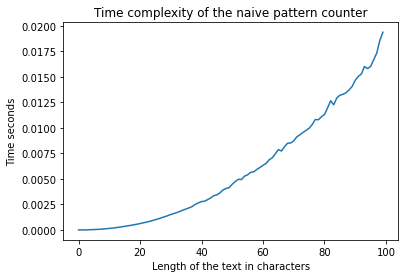

In [209]:
#counting the number of times each phrase appears in each document using the naive pattern counter
#making a list of words a joined string of text
def get_string(list_of_words):
    """
    This function takes a list of words as input and returns a string of the words.
    Input
    ----------
    list_of_words : list
    A list of words.

    Returns
    -------
    string : string
    A string of the words.
    """
    string = "" #define the string
    for word in list_of_words: #loop through the words
        string += word + " " #add the word to the string with a space after each word
    return string #return the string

def count_phrases_naive(phrases_list, text):
    """
    This function takes a list of phrases and a text as input and returns
    the number of times each phrase appears in the text.

    Input
    ----------
    phrases_list : list
    A list of phrases.
    text : string
    A text.

    Returns
    -------
    counter : int
    The number of times each phrase appears in the text.
    """
    counter=0
    for phrase in phrases_list: #loop through the phrases
        counter+=naive_pattern_counter(phrase, get_string(text))
        #increment the counter by the number of times the phrase appears in the text
    return counter

#print(count_phrases_naive(phrases_version_1, version_2))
#The above is possbile but it is not efficient because it is O(n^2)
#where n is the number of words in the text.

#counting the number of times each phrase appears in each document using the naive pattern counter
#creating a plot to show that it is O(n^2)
import matplotlib.pyplot as plt
import time
import random
import string

def random_string(stringLength=10):
    """
    Generate a random string of fixed length 
    Parameters
    ----------
    stringLength : int
    The length of the string.
    Returns
    -------
    string
    A random string.
    """
    letters = string.ascii_lowercase
    return ''.join(random.choice(letters) for i in range(stringLength))

def get_random_text(length):
    """
    This function takes a length as input and
    returns a random text of the length.
    Input
    ----------
    length : int
    The length of the text.

    Returns
    -------
    text : list
    A random text of the length.
    """
    text = [] #define the text
    for i in range(length): #loop through the length
        text.append(random_string()) #append a random word to the text
    return text #return the text

def get_random_phrases(length):
    """
    This function takes a length as input and
    returns a random list of phrases of the length.
    Input
    ----------
    length : int
    The length of the list of phrases.

    Returns
    -------
    phrases : list
    A random list of phrases of the length.
    """
    phrases = [] #define the phrases
    for i in range(length): #loop through the length
        phrases.append(random_string()) #append a random phrase to the phrases
    return phrases #return the phrases

def get_random_text_phrases(length):
    """
    This function takes a length as input and returns a
    random text and a random list of phrases of the length.
    Input
    ----------
    length : int
    The length of the text and the list of phrases.

    Returns
    -------
    text : list
    A random text of the length.
    phrases : list
    A random list of phrases of the length.
    """
    text = get_random_text(length) #get a random text of the length
    phrases = get_random_phrases(length) #get a random list of phrases of the length
    return text, phrases #return the text and the phrases

def get_time(text, phrases):
    """
    This function takes a text and a list of phrases as input and
    returns the time it takes to count the number of times each phrase appears in the text.
    Input
    ----------
    text : list
    A text.
    phrases : list
    A list of phrases.

    Returns
    -------
    time : float
    The time it takes to count the number of times each phrase appears in the text.
    """
    experiments=[]
    for i in range(31): #loop through 100 times
        start_time = time.process_time() #get the start time
        count_phrases_naive(phrases, text) #count the number of times each phrase appears in the text
        end_time = time.process_time() #get the end time
        experiments.append(end_time - start_time) #append the time it takes to count the
    return sum(experiments)/30 #return the time it takes to count the
    #number of times each phrase appears in the text

def get_time_list(length):
    """
    This function takes a length as input and returns a list of times it takes
    to count the number of times each phrase appears in the text for a random
    text and a random list of phrases of the length.

    Input
    ----------
    length : int
    The length of the text and the list of phrases.

    Returns
    -------
    time_list : list
    A list of times it takes to count the number of times each phrase appears in
    the text for a random text and a random list of phrases of the length.
    """
    time_list = [] #define the time list
    for i in range(length): #loop through the length
        text, phrases = get_random_text_phrases(i) #get a random text and a random
                                                    #list of phrases of the length
        
        time_list.append(get_time(text, phrases)) #append the time it takes to count the number of times each phrase
                                #appears in the text for the random text and the random list of phrases of the length
    return time_list #return the time list

def plot_time_list(time_list):
    """
    This function takes a list of times as input and plots the list of times.
    Input
    ----------
    time_list : list
    A list of times.
    """
    plt.plot(time_list) #plot the list of times
    plt.xlabel("Length of the text in characters") 
    plt.ylabel("Time seconds")
    plt.title("Time complexity of the naive pattern counter")
    plt.show() 

#plot the list of times it takes to count the number of times each phrase appears in the text
# for a random text and a random list of phrases of the length

plot_time_list(get_time_list(100)) 





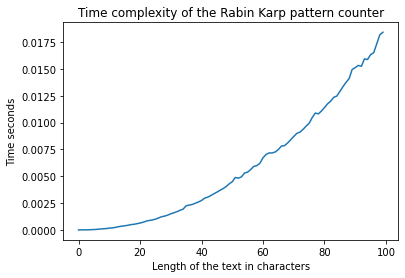

In [211]:
#Rabin Karp Algorithm for Pattern Searching
d = 256 #number of characters in the alphabet of the input text
def pattern_counter(pattern, text, prime_number):
    """
    This function takes a pattern, a text and a prime number as input and
    returns the number of times the pattern appears in the text.
    Input
    ----------
    pattern : string
    A pattern.
    text : string
    A text.
    prime_number : int
    A prime number.
    
    Returns
    -------
    pattern_count : int
    The number of times the pattern appears in the text.
    """
    pattern_length = len(pattern)
    text_length = len(text) #length of text
    i = 0 # index of text[]
    j = 0 # index of pattern[]
    p = 0 # pattern's hash value
    t = 0 # text's hash value
    pattern_count=0


    h = 1 #defining h value
    for i in range(pattern_length-1):
        h = (h*d) % prime_number #calculating value of
        #h would be "pow(d, pattern_length-1)%q"

	
    for i in range(pattern_length): # getting the hash value of pattern and first window of text
        p = (d*p + ord(pattern[i])) % prime_number
        t = (d*t + ord(text[i])) % prime_number

    for i in range(text_length-pattern_length+1): #sliding the pattern over text one by one
        if p == t: #if the hash values match then only check for characters on by one
            #go through the pattern and text and check if they match one by one
            for j in range(pattern_length):
                #if the characters don't match then break
                if text[i+j] != pattern[j]:
                    break
                else: #if the characters match then increment j
                    j += 1

			
            if j == pattern_length: #if j is equal to the length of the pattern
                #then it means the pattern was found
                    pattern_count+=1

		#getting the hash value of the next window of text by sliding the window and removing
        # the hash value of the previous char removed from the window
        if i < text_length-pattern_length: 
            t = (d*(t-ord(text[i])*h) + ord(text[i+pattern_length])) % prime_number

			# We might get negative values of t, converting it to
			# positive
            if t < 0:
                t = t+prime_number

    return pattern_count

#testing
text = "THIS TEXT IS A TEST TEXT"
pattern = "TEXT"
prime = 101
#test the pattern_counter function
assert(pattern_counter(pattern, text, prime)== 2)

def count_phrases(phrases_list, list_of_words):
    """
    This function takes a list of phrases and a list of words as input and
    returns the number of times each phrase appears in the list of words.
    Input
    ----------
    phrases_list : list
    A list of phrases.
        
    list_of_words : list
    A list of words.
    
    Returns
    -------
    counter : int
    The number of times each phrase appears in the list of words.
    """
    counter=0
    for phrase in phrases_list:
        counter+=pattern_counter(phrase, get_string(list_of_words),prime)
    return counter

#Testing the plaigarism with this example

# print("count of common phrases of version one with itself, version two, and version three respectively:")
# print(count_phrases(phrases_version_1, version_1))
# print(count_phrases(phrases_version_1, version_2))
# print(count_phrases(phrases_version_1, version_3))
# print("count of common phrases of version two with itself, version two, and version three respectively:")

# print(count_phrases(phrases_version_2, version_2))
# print(count_phrases(phrases_version_2, version_1))
# print(count_phrases(phrases_version_2, version_3))
# print("count of common phrases of version three with itself, version two, and version three respectively:")

# print(count_phrases(phrases_version_3, version_3))
# print(count_phrases(phrases_version_3, version_2))
# print(count_phrases(phrases_version_3, version_1))


#plot the list of times it takes to count the number of times each phrase appears in the text
# for a random text and a random list of phrases of the length
plt.plot(get_time_list(100)) #plot the list of times
plt.xlabel("Length of the text in characters") 
plt.ylabel("Time seconds")
plt.title("Time complexity of the Rabin Karp pattern counter")
plt.show()

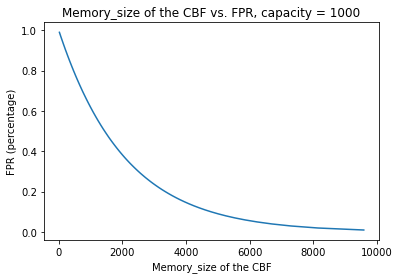

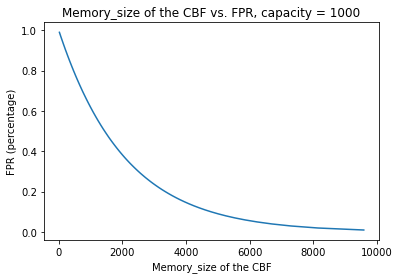

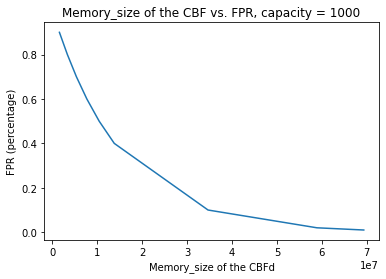

In [187]:
#create a plot to show how does the memory_size of cbf scale with fpr theoretically

import matplotlib.pyplot as plt
import numpy as np
capacity=1000
def plot_cbf_memory_size(fpr):
    plt.plot([(-1*round ((capacity * math.log (i)) / (math.log (2))**2)) for i in fpr],fpr)
    plt.ylabel("FPR (percentage)")
    plt.xlabel("Memory_size of the CBF")
    plt.title("Memory_size of the CBF vs. FPR, capacity = 1000")
    plt.show()

plot_cbf_memory_size([i/100 for i in range(1, 100)])

#creating the plot using bloom filters class defined above

capacity=1000
def plot_bf_memory_size(fpr):
    plt.plot([CountingBloomFilters(capacity, i).memory_size for i in fpr],fpr)
    plt.ylabel("FPR (percentage)")
    plt.xlabel("Memory_size of the CBF")
    plt.title("Memory_size of the CBF vs. FPR, capacity = 1000")
    plt.show()

plot_bf_memory_size([i/100 for i in range(1, 100)])

capacity=1000

URL="https://gist.githubusercontent.com/raquelhr/78f66877813825dc344efefdc684a5d6/raw/361a40e4cd22cb6025e1fb2baca3bf7e166b2ec6/"
#using this link and make it into a list of words
list_of_words=get_txt_into_list_of_words(URL)
phrases=get_phrases(list_of_words)
cbf_test_1=create_cbf(phrases, fprate=0.01)
cbf_test_2=create_cbf(phrases, fprate=0.02)
cbf_test_3=create_cbf(phrases, fprate=0.1)
cbf_test_4=create_cbf(phrases, fprate=0.4)
cbf_test_5=create_cbf(phrases, fprate=0.5)
cbf_test_6=create_cbf(phrases, fprate=0.6)
cbf_test_7=create_cbf(phrases, fprate=0.7)
cbf_test_8=create_cbf(phrases, fprate=0.8)
cbf_test_9=create_cbf(phrases, fprate=0.9)

list_cbf_experiment=[cbf_test_1, cbf_test_2, cbf_test_3, cbf_test_4, cbf_test_5,
cbf_test_6, cbf_test_7, cbf_test_8, cbf_test_9]

import sys
fpr=[0.01,0.02,0.1,0.4,0.5,0.6,0.7,0.8,0.9]
sizes=[]
for cbf in list_cbf_experiment:
    sizes.append(sys.getsizeof(cbf.array))

plt.plot(sizes,fpr)
plt.ylabel("FPR (percentage)")
plt.xlabel("Memory_size of the CBFd")
plt.title("Memory_size of the CBF vs. FPR, capacity = 1000")
plt.show()


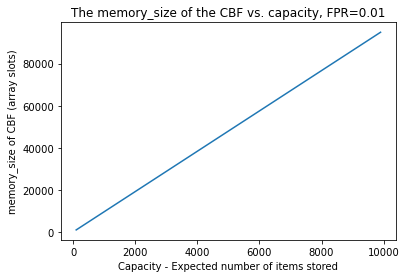

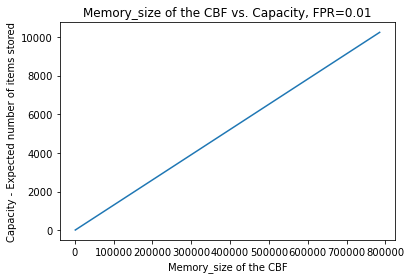

In [197]:
#plot how the memory_size scale with the number of items stored for a fixed fpr

def plot_memory_memory_size(fpr, capacity):
    plt.plot(capacity, [CountingBloomFilters(i, fpr).memory_size for i in capacity])
    plt.xlabel("Capacity - Expected number of items stored")
    plt.ylabel("memory_size of CBF (array slots)")
    plt.title("The memory_size of the CBF vs. capacity, FPR=0.01")
    plt.show()

plot_memory_memory_size(0.01, [i for i in range(100, 10000, 100)])

cbf_test_1=create_cbf(phrases[:20], fprate=0.01)
cbf_test_2=create_cbf(phrases[:40], fprate=0.01)
cbf_test_3=create_cbf(phrases[:80], fprate=0.01)
cbf_test_4=create_cbf(phrases[:160], fprate=0.01)
cbf_test_5=create_cbf(phrases[:320], fprate=0.01)
cbf_test_6=create_cbf(phrases[:640], fprate=0.01)
cbf_test_7=create_cbf(phrases[:1280], fprate=0.01)
cbf_test_8=create_cbf(phrases[:2560], fprate=0.01)
cbf_test_9=create_cbf(phrases[:5120], fprate=0.01)
cbf_test_10=create_cbf(phrases[:10240], fprate=0.01)


list_cbf_experiment=[cbf_test_1, cbf_test_2, cbf_test_3, cbf_test_4, cbf_test_5,
cbf_test_6, cbf_test_7, cbf_test_8, cbf_test_9, cbf_test_10]



import sys
sizes=[]
for cbf in list_cbf_experiment:
    sizes.append(sys.getsizeof(cbf.array))


plt.plot(sizes,[20,40,80,160,320,640,1280,2560,5120,10240])
plt.ylabel("Capacity - Expected number of items stored")
plt.xlabel("Memory_size of the CBF")
plt.title("Memory_size of the CBF vs. Capacity, FPR=0.01")
plt.show()








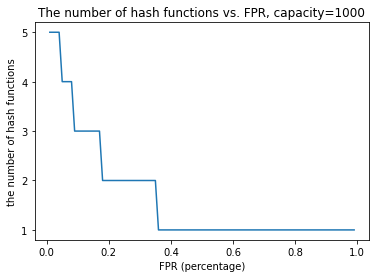

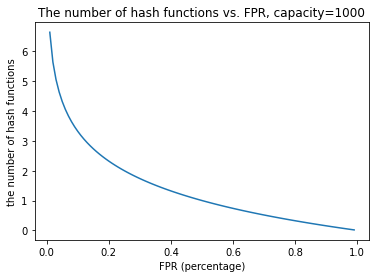

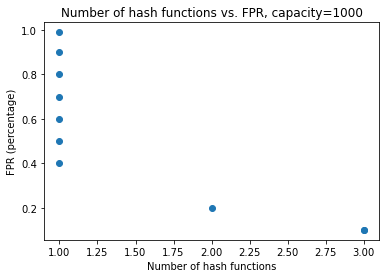

In [200]:
#plot how does the fpr scale with the num_hashfn in the counting bloom filter

def plot_fpr(fpr, capacity):
    plt.plot(fpr, [CountingBloomFilters(capacity, i).num_hashfn for i in fpr])
    plt.xlabel("FPR (percentage)")
    plt.ylabel("the number of hash functions")
    plt.title("The number of hash functions vs. FPR, capacity=1000")
    plt.yticks(np.arange(1, 6, step=1))
    plt.show()

plot_fpr([i/100 for i in range(1, 100)], 1000)

#plot how does the fpr scale with the num_hashfn in the counting bloom filter using that num_hashfn= - log base 2 of fpr

def plot_fpr(fpr, capacity):
    plt.plot(fpr, [-1*math.log(i, 2) for i in fpr])
    plt.xlabel("FPR (percentage)")
    plt.ylabel("the number of hash functions")
    plt.title("The number of hash functions vs. FPR, capacity=1000")
    plt.show()

plot_fpr([i/100 for i in range(1, 100)], 1000)

cbf_test_1=create_cbf(phrases, fprate=0.1)
cbf_test_2=create_cbf(phrases, fprate=0.2)
cbf_test_3=create_cbf(phrases, fprate=0.1)
cbf_test_4=create_cbf(phrases, fprate=0.4)
cbf_test_5=create_cbf(phrases, fprate=0.5)
cbf_test_6=create_cbf(phrases, fprate=0.6)
cbf_test_7=create_cbf(phrases, fprate=0.7)
cbf_test_8=create_cbf(phrases, fprate=0.8)
cbf_test_9=create_cbf(phrases, fprate=0.9)
cbf_test10=create_cbf(phrases, fprate=0.99)

list_cbf_experiment=[cbf_test_1, cbf_test_2, cbf_test_3, cbf_test_4, cbf_test_5,
cbf_test_6, cbf_test_7, cbf_test_8, cbf_test_9, cbf_test10]

number_of_h_func=[]
for cbf in list_cbf_experiment:
    number_of_h_func.append((cbf.num_hashfn))

plt.scatter(number_of_h_func,[0.1,0.2,0.1,0.4,0.5,0.6,0.7,0.8,0.9,0.99])
plt.ylabel("FPR (percentage)")
plt.xlabel("Number of hash functions")
plt.title("Number of hash functions vs. FPR, capacity=1000")
plt.show()




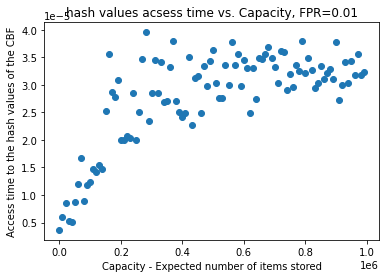

In [208]:
#create a function to  time the access time of to the hash values of the counting bloom filter using time.process_time()

import time
def time_access_time(fpr, capacity):
    
    experiemnts=[]
    for i in range(100):
        cbf_exp=CountingBloomFilters(capacity, fpr)
        start=time.process_time()
        cbf_exp.search("anything")
        end=time.process_time()
        experiemnts.append(end-start)
    return sum(experiemnts)/len(experiemnts)

#create a plot for the access time of the hash values of the counting bloom filter vs the capacity



def plot_access_time(fpr, capacity):
    plt.scatter(capacity, [time_access_time(fpr, i) for i in capacity])
    plt.xlabel("Capacity - Expected number of items stored")
    plt.ylabel("Access time to the hash values of the CBF")
    plt.title("hash values acsess time vs. Capacity, FPR=0.01")
    plt.show()
    

plot_access_time(0.01, [i for i in range(100, 1000000, 10000)])

#run the above experiemnt 60 times and average the results and plot those




